# **QUESTIONS**

#1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

**ANSWER**

Anomaly Detection is the process of identifying data points, events, or observations that deviate significantly from a dataset's normal behavior. These
outliers often indicate critical incidents such as bank fraud, structural defects, or health issues.

- **Point Anomalies:** A single data instance is considered anomalous compared to the rest of the data.

  -  Example: A credit card transaction of 10,000 dollar for a user who typically spends only 20-50 dollar per transaction.

- **Contextual Anomalies:** An observation is anomalous only within a specific context.

  -  Example: A temperature reading of 35°C (95°F) is normal in summer but is a contextual anomaly if recorded in the middle of winter in a cold climate.

- **Collective Anomalies:** A collection of related data instances is anomalous relative to the entire dataset, even if individual points are not.

  -  Example: A sustained flat line in an EKG heart rate monitor; while a single heartbeat value is normal, the lack of variation over time indicates a problem.
---
#2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases.

**ANSWER**

| Feature | Isolation Forest | DBSCAN | Local Outlier Factor (LOF) |
| :--- | :--- | :--- | :--- |
| **Approach** | Isolates observations by <br> randomly selecting a<br> feature and a split value.|Groups points that are <br>closely packed; points <br>in low-density regions<br> are marked as outliers.|Compares the local <br>density of a point to <br>the local densities of its <br>neighbors.|
| **Logic** |Anomalies are easier to <br> isolate and have shorter "paths"<br> in a tree structure.|Focuses on global density<br> and spatial clusters.|Focuses on local deviations; <br>an anomaly has lower density<br> than neighbors.|
| **Use Case** |High-dimensional data <br>and large datasets where<br> efficiency is key.|Spatial data where anomalies<br> are "noise" outside defined<br> clusters.|Datasets with varying densities<br> where an outlier might be local.|
---
#3. What are the key components of a Time Series? Explain each with one example.

**ANSWER**

- **Trend:** The long-term increase or decrease in the data over a long period.

  -  Example: The gradual rise in global temperatures over the last century.

- **Seasonality:** Short-term regular periodic fluctuations that repeat within a specific period (e.g., daily, weekly, monthly).

  -  Example: Increased electricity consumption every evening or higher retail sales every December.

- **Cyclical:** Fluctuations that occur at irregular intervals, usually influenced by business or economic cycles.

  -  Example: Periods of economic recession and expansion that occur every few years.

- **Residual / Noise:** Random, unpredictable variations that remain after removing trend and seasonality.

  -  Example: A sudden spike in stock prices due to an unexpected news event.
---

#4. Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

**ANSWER**

A **Stationary** time series is one whose statistical properties, such as mean, variance, and autocorrelation, do not change over time. Most forecasting models (like ARIMA) require stationarity to make reliable predictions.

- **How to Test:**

  -  **Augmented Dickey-Fuller (ADF) Test:** A statistical test where the null hypothesis is that the series is non-stationary. A low p-value (typically $< 0.05$) indicates stationarity.
  
  - **Visual Inspection:** Plotting the mean and variance over time to see if they remain constant.
  
- **How to Transform:**

  -  **Differencing:** Subtracting the current value from the previous value ($y'_t = y_t - y_{t-1}$) to remove trend.
  
  - **Log Transformation:** Taking the logarithm of the data to stabilize non-constant variance.
---
#5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

**ANSWER**

- **AR (Autoregressive):** Predicts future values based on a linear combination of past values. Used for data with high autocorrelation.

- **MA (Moving Average):** Predicts future values based on past forecast errors. Used to smooth out random "shocks" in data.

- **ARIMA (AutoRegressive Integrated Moving Average):** Combines AR and MA and adds Differencing (I) to handle non-stationary data.

- **SARIMA (Seasonal ARIMA):** Extends ARIMA by adding seasonal components to handle repeating periodic patterns.

- **SARIMAX (SARIMA with eXogenous variables):** Adds external factors (exogenous variables) that influence the time series, such as using weather data to help predict energy demand.
---
#6. Dataset:
#● NYC Taxi Fare Data
#● AirPassengers Dataset
# Question: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components

**ANSWER**

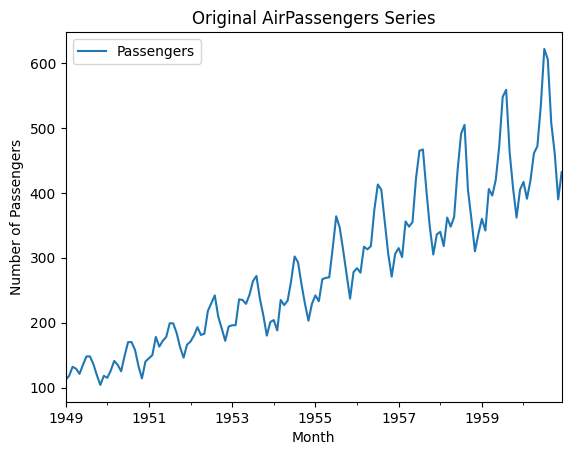

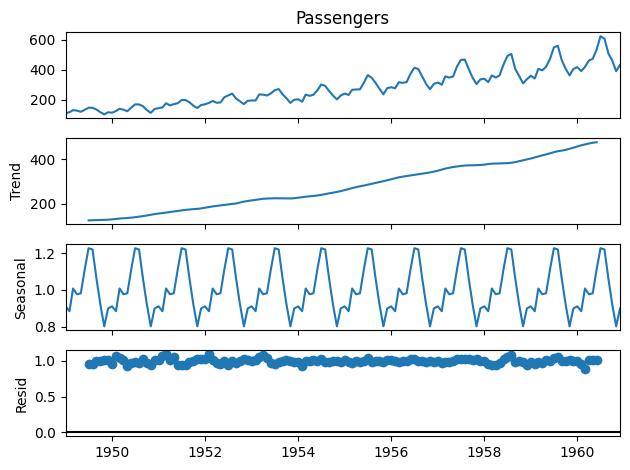

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Plot original series
df.plot(title="Original AirPassengers Series")
plt.ylabel("Number of Passengers")
plt.show()

# Decompose into trend, seasonality, and residual
result = seasonal_decompose(df['Passengers'], model='multiplicative')
result.plot()
plt.show()

#7.  Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

**ANSWER**

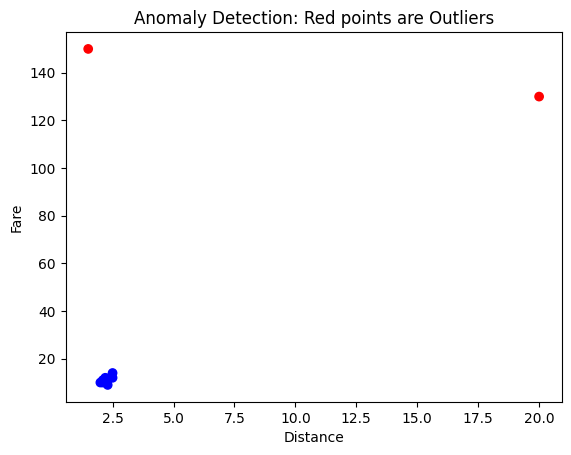

In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Sample numerical data (Simulating Fare vs Distance)
data = {'fare': [10, 12, 11, 150, 9, 11, 12, 130, 10, 12, 11, 14],
        'dist': [2, 2.5, 2.1, 1.5, 2.3, 2.2, 2.4, 20, 2.1, 2.2, 2.3, 2.5]}
df = pd.DataFrame(data)

# Apply Isolation Forest
# contamination is the expected proportion of outliers
clf = IsolationForest(contamination=0.15, random_state=42)
df['anomaly'] = clf.fit_predict(df[['fare', 'dist']])

# Visualize: 1 = Normal, -1 = Anomaly
colors = {1: 'blue', -1: 'red'}
plt.scatter(df['dist'], df['fare'], c=df['anomaly'].map(colors))
plt.title("Anomaly Detection: Red points are Outliers")
plt.xlabel("Distance")
plt.ylabel("Fare")
plt.show()

#8. Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

**ANSWER**

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


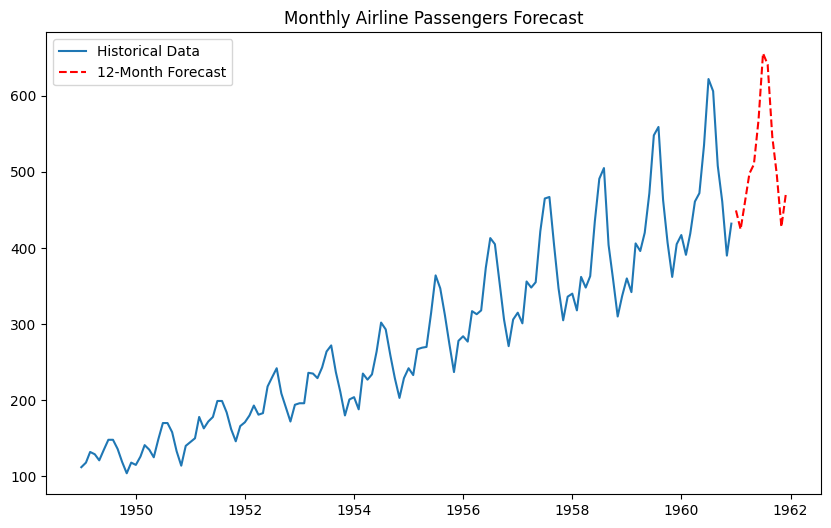

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Train SARIMA (using standard seasonal parameters for monthly data)
model = SARIMAX(df['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast the next 12 months
forecast = model_fit.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean

# Visualize
plt.figure(figsize=(10,6))
plt.plot(df, label='Historical Data')
plt.plot(forecast_mean, label='12-Month Forecast', color='red', linestyle='--')
plt.title("Monthly Airline Passengers Forecast")
plt.legend()
plt.show()

#9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

**ANSWER**

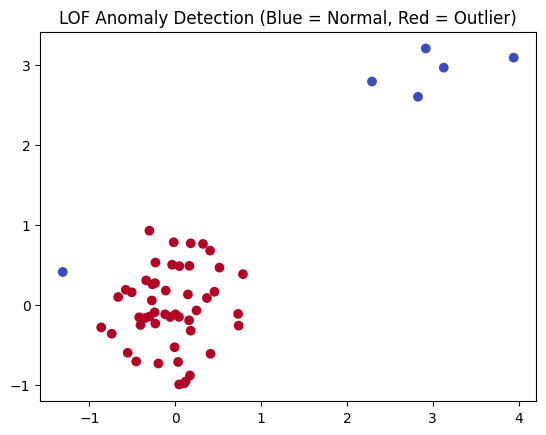

In [4]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Generate dummy numerical data
np.random.seed(42)
X = np.r_[np.random.normal(0, 0.5, (50, 2)), np.random.normal(3, 0.5, (5, 2))]

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.title("LOF Anomaly Detection (Blue = Normal, Red = Outlier)")
plt.show()

#10. You are working as a data scientist for a power grid monitoring company. Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
#Explain your real-time data science workflow:
#● How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?
#● Which time series model would you use for short-term forecasting (ARIMA / SARIMA / SARIMAX)?
#● How would you validate and monitor the performance over time?
#● How would this solution help business decisions or operations?

**ANSWER**

- **Anomaly Detection:** For streaming 15-minute consumption data, Isolation Forest is the best choice. It is computationally efficient for real-time streams and effectively identifies sudden "spikes or drops".

- **Forecasting Model:** SARIMAX should be used for short-term forecasting. This model allows for the inclusion of weather conditions as exogenous variables, which are critical drivers of energy usage.

- **Validation:** Performance should be monitored using a sliding window validation strategy, tracking metrics like Mean Absolute Error (MAE) to ensure the model adapts to changing demand patterns.

- **Business Impact:** This solution enables the company to prevent grid failures by predicting overloads and reduces costs by optimizing power generation based on accurate demand forecasts.